<a href="https://colab.research.google.com/github/anjali0503/PROJECTS/blob/main/Terrorism_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

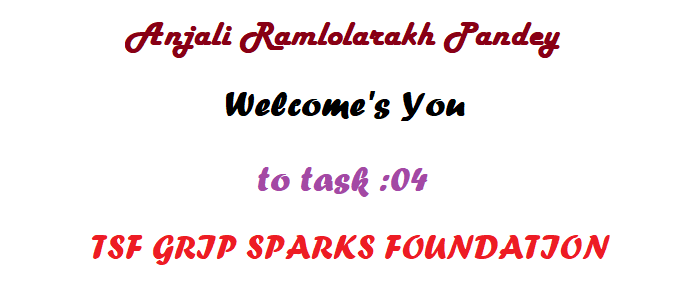



Exploratory Data Analysis - Terrorism

## TASK:04

'As a security/defense analyst, try to find out the hot zone of terrorism.'

In [ ]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding="latin-1") #extracting data
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
data.head() #Return first 5 rows of dataframe

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
data.tail()   #Return last 5 rows of dataframe

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181430,201712200020,2017,12,20,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Tamontaka,7.172751,124.229664,1.0,0,The incident occurred in the Datu Odin Sinsuat...,12/20/2017: Assailants threw a grenade at a mi...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,1.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Armed Forces of the Philippines (AFP),Checkpoint,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),-99.0,A dump truck was damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Army troopers kill 11 IS gunmen in North Cota...","""Cotabato security up due to twin grenade atta...","""Philippines: Grenade Explosions Rock Two Mili...",START Primary Collection,0.0,0.0,0.0,0.0,"201712200020, 201712200021"
181431,201712200021,2017,12,20,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Tamontaka,7.172751,124.229664,1.0,0,The incident occurred in the Datu Odin Sinsuat...,12/20/2017: Assailants threw a grenade at a mi...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,1.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Armed Forces of the Philippines (AFP),Checkpoint,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),-99.0,A wall was damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Army troopers kill 11 IS gunmen in North Cota...","""Cotabato security up due to twin grenade atta...","""Philippines: Grenade Explosions Rock Two Mili...",START Primary Collection,0.0,0.0,0.0,0.0,"201712200020, 201712200021"
181432,201712200022,2017,12,20,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Bari,Galgala,11.104873,48.971616,1.0,1,The incident occurred in the Madar Shoon area.,12/20/2017: An explosive device detonated targ...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,35.0,Military Transportation/Vehicle (excluding con...,Puntland Security Force (PSF),Vehicle,...,NaN,NaN,A roadside landmine was used in the attack.,2.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,Unknown,-99.0,A military vehicle was damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Bomb blast kills Security Officials ...","""Somalia: Al-Shabaab Reportedly Kills Puntland...",NaN,START Primary Collection,0.0,0.0,0.0,0.0,NaN
181433,201712200023,2017,12,20,NaN,0,NaN,138,Myanmar,5,Southeast Asia,Rakhine,Sittwe,20.147602,92.895952,1.0,0,NaN,12/20/2017: Assailants stabbed Kyaw Lin in Sit...,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,NaN,NaN,ROMA Time,Founder: Kyaw Lin,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kyaw Lin was also a contributor to the Democra...,"""Journalist stabbed in Sittwe,"" Democratic Voi...","""Burma: State PAS Latest News 21 December 2017...",NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
181434,201712200024,2017,12,20,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Deir ez-Zor,Shahil,35.099121,40.4593

In [ ]:
data.dtypes        #Datatypes present in the data

eventid         int64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG       float64
INT_IDEO      float64
INT_MISC      float64
INT_ANY       float64
related        object
Length: 135, dtype: object

In [ ]:
data.columns.values    #Return an array of index of columns

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
df=data[['iyear','imonth','iday']].copy()      #Copying specific data into another variable
df.columns=['year','month','day']
df=df. applymap(str) 
data['time']=pd.to_datetime(df[['year','month','day']], format='%Y%m%d', errors='coerce')
data['imonth']=data['imonth'].replace(0,np.nan)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,time
0,197000000001,1970,7.0,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN,1970-07-02
1,197000000002,1970,NaN,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN,NaT
2,197001000001,1970,1.0,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN,NaT
3,197001000002,1970,1.0,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN,NaT
4,197001000003,1970,1.0,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN,NaT


In [ ]:
data.info()       #Info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181435 entries, 0 to 181434
Columns: 136 entries, eventid to time
dtypes: datetime64[ns](1), float64(63), int64(14), object(58)
memory usage: 188.3+ MB


In [ ]:
missing_data = data.isnull()      #Detect missing values
missing_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,time
0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,False,True,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True,False
1,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,...,True,True,False,True,True,False,True,True,False,True,True,True,True,False,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True,True
2,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,...,True,True,False,True,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True,True
3,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,False,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True,True
4,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,False,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True,True


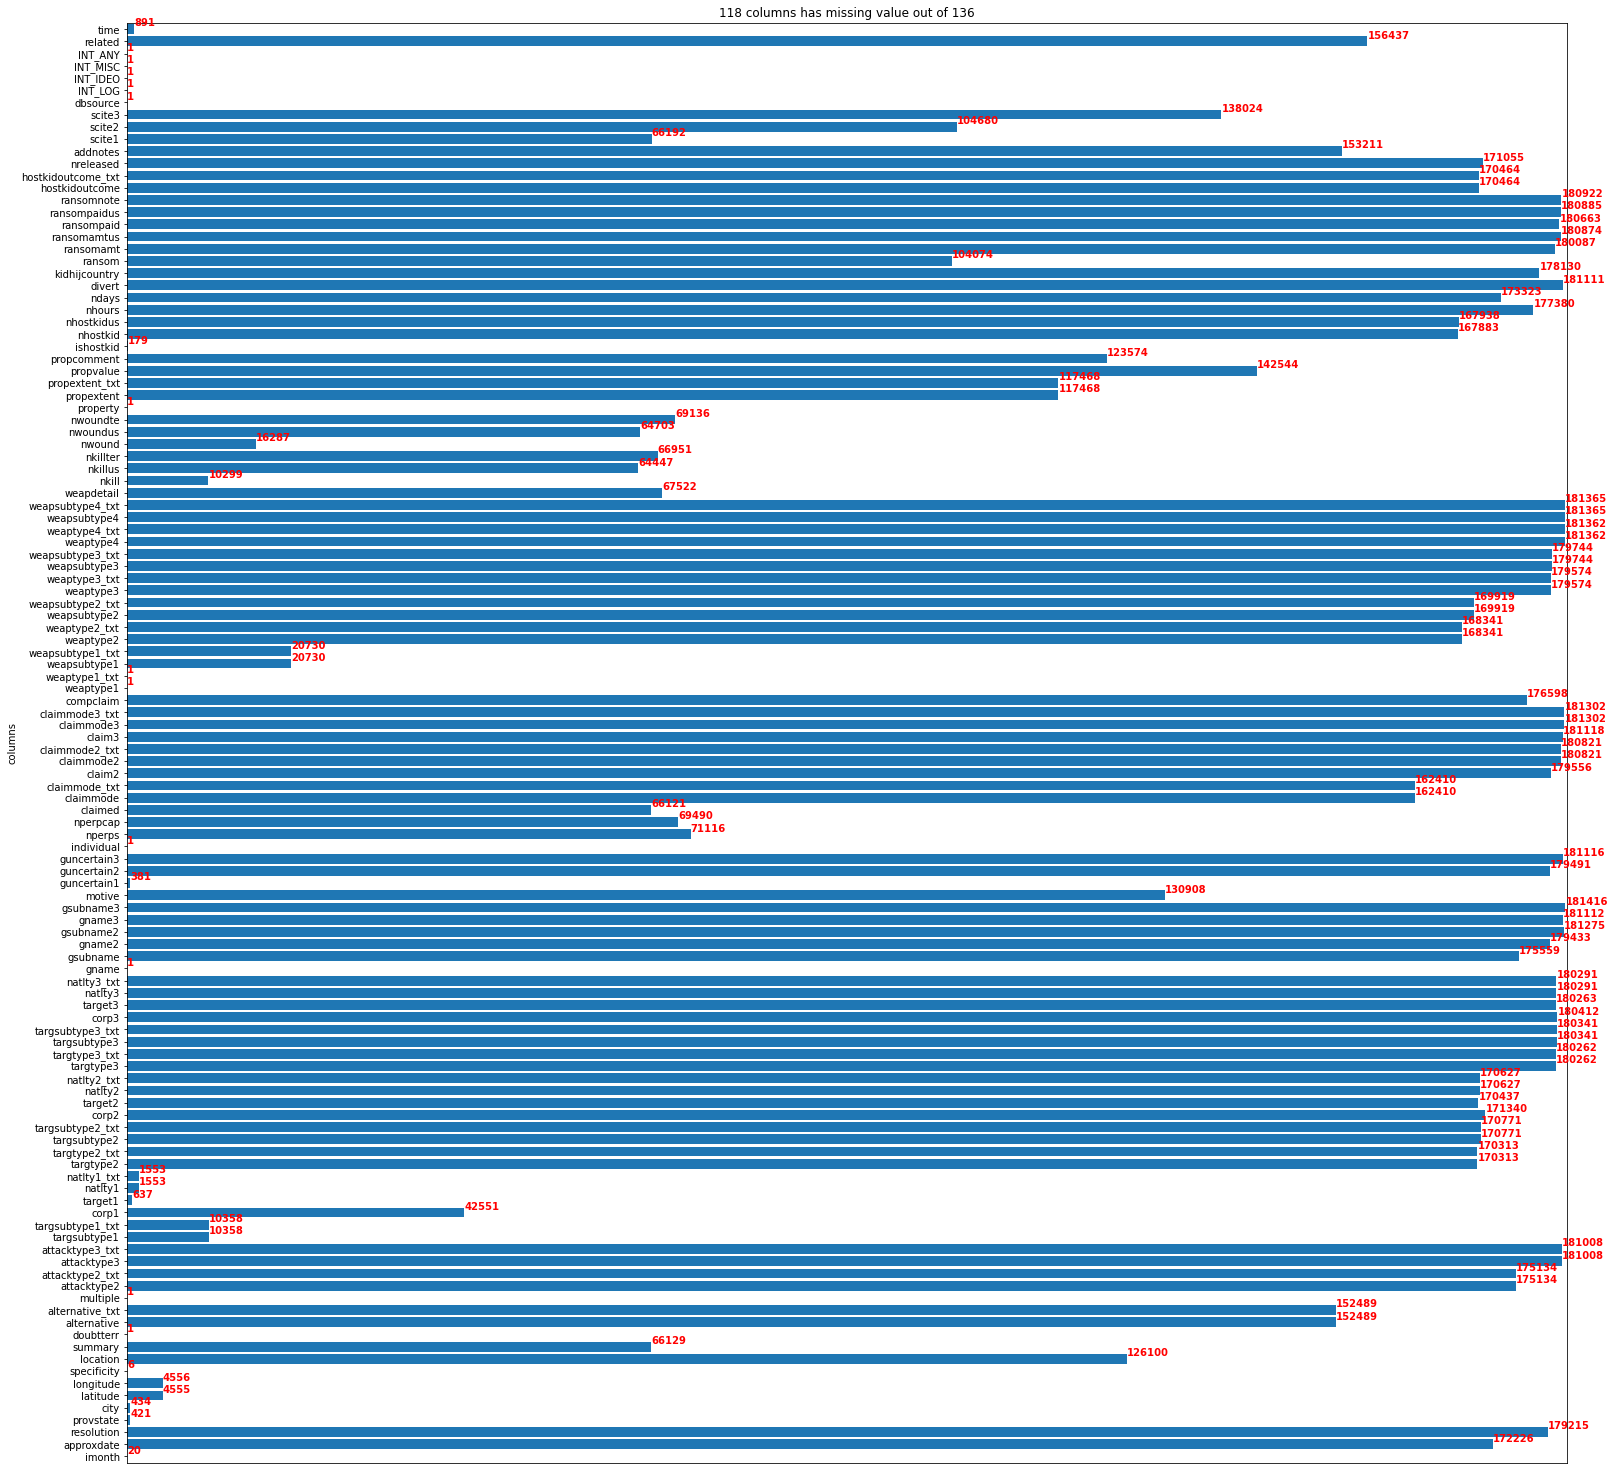

In [ ]:
colm=[]
value=[]
for col in missing_data.columns.values.tolist():
    
    if missing_data[col].value_counts().shape==(2,):
        colm.append(col)
        value.append(missing_data[col].value_counts()[1])
fig1 = plt.figure(figsize=(20,20))
ax = fig1.add_axes([0,0,1,1])
ax.barh(colm,value)
ax.margins(0.001,0.001)
plt.xticks(rotation=90)
for i, v in enumerate(value):
    ax.text(v + 4, i + .25, str(v), color='red', fontweight='bold')
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False) 
ax.set_title('{} columns has missing value out of {}'.format(len(colm), data.shape[1]))
ax.set_ylabel("columns")
plt.show()

In [ ]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.814350e+05,181435.000000,181415.000000,181435.000000,181435.000000,181435.000000,181435.000000,176880.000000,1.768790e+05,181429.000000,181435.000000,181435.000000,181435.000000,181435.000000,181434.000000,28946.000000,181434.000000,181435.000000,181435.000000,181435.000000,6301.000000,427.000000,181435.000000,171077.000000,179882.000000,11122.000000,10664.000000,10808.000000,1173.000000,1094.000000,1144.000000,181054.000000,1944.000000,319.000000,181434.000000,110319.000000,111945.000000,115314.000000,19025.000000,1879.000000,614.000000,317.000000,133.000000,4837.000000,181434.000000,160705.000000,13094.000000,11516.000000,1861.000000,1691.000000,73.000000,70.000000,171136.000000,116988.000000,114484.000000,165148.000000,116732.000000,112299.000000,181434.000000,63967.000000,3.889100e+04,181256.000000,13552.000000,13497.000000,4055.000000,8112.000000,77361.000000,1.348000e+03,5.610000e+02,7.720000e+02,550.000000,10971.000000,10380.000000,181434.000000,181434.000000,181434.000000,181434.000000
mean,2.002685e+11,2002.618734,6.460182,15.490683,0.045317,131.974977,7.159545,23.498331,-4.594353e+02,1.451367,0.068283,0.988536,0.993083,0.875818,-0.524268,1.293201,0.137747,0.889619,0.036476,3.246777,3.716553,5.252927,8.439127,46.969312,127.681547,10.246448,55.311047,131.158309,10.011083,55.508227,144.641608,0.081517,0.264918,0.194357,0.002943,-65.321957,-1.519577,0.049274,7.023075,0.248004,7.175896,0.413249,6.729323,-6.299359,6.446730,11.117762,6.811211,10.755297,6.911875,11.645180,6.246575,10.842857,2.403007,0.046082,0.508298,3.169024,0.039021,0.107062,-0.543338,3.295309,2.093383e+05,0.059275,4.548849,-0.354523,-46.744205,-32.467825,-0.145758,3.177219e+06,5.805489e+05,7.197981e+05,241.252727,4.628566,-28.990751,-4.544881,-4.465640,0.090033,-3.946906
std,1.325785e+09,13.257796,3.383816,8.810409,0.207998,112.424871,2.933797,18.573945,2.049265e+05,0.995598,0.284575,0.106456,0.082881,0.329790,2.457323,0.703828,0.344635,0.313365,0.187472,1.915034,2.270926,2.243762,6.654099,30.955624,89.283310,5.710624,25.648007,125.737170,5.727222,26.312421,163.456184,0.273628,0.441403,0.396327,0.054172,216.777812,12.838227,1.094203,2.478576,0.976407,2.788055,0.493195,2.908003,4.232895,2.172591,6.496237,2.275182,7.594959,2.178530,8.493545,1.507212,8.192672,11.551721,5.688092,4.203847,35.973799,3.060723,1.489788,3.121648,0.486918,1.554417e+07,0.459001,202.461612,6.840694,82.848367,121.278431,1.207581,3.023375e+07,7.090467e+06,1.015700e+07,2946.283524,2.035631,65.743150,4.543518,4.637056,0.568774,4.691402
min,1.970000e+11,1970.000000,1.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

Plotting

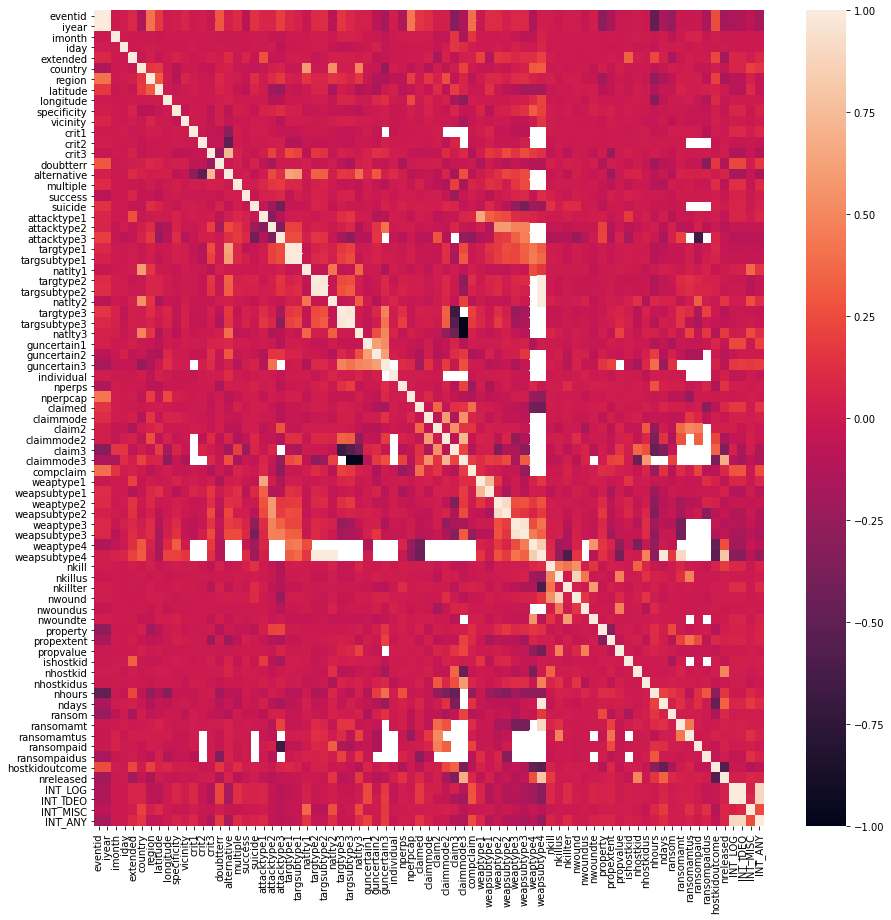

In [ ]:
corr=data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           ax=ax)

In [ ]:
col=['iyear','imonth','iday','time','country_txt','region_txt','provstate','gname','city',
 'latitude',
 'longitude','attacktype1_txt','success','suicide','targtype1_txt','weaptype1_txt','nkill','nwound','ishostkid']
datanew=data[col]
datanew.head()

,iyear,imonth,iday,time,country_txt,region_txt,provstate,gname,city,latitude,longitude,attacktype1_txt,success,suicide,targtype1_txt,weaptype1_txt,nkill,nwound,ishostkid
0,1970,7.0,2,1970-07-02,Dominican Republic,Central America & Caribbean,NaN,MANO-D,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Private Citizens & Property,Unknown,1.0,0.0,0.0
1,1970,NaN,0,NaT,Mexico,North America,Federal,23rd of September Communist League,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),1,0,Government (Diplomatic),Unknown,0.0,0.0,1.0
2,1970,1.0,0,NaT,Philippines,Southeast Asia,Tarlac,Unknown,Unknown,15.478598,120.599741,Assassination,1,0,Journalists & Media,Unknown,1.0,0.0,0.0
3,1970,1.0,0,NaT,Greece,Western Europe,Attica,Unknown,Athens,37.997490,23.762728,Bombing/Explosion,1,0,Government (Diplomatic),Explosives,NaN,NaN,0.0
4,1970,1.0,0,NaT,Japan,East Asia,Fukouka,Unknown,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,1,0,Government (Diplomatic),Incendiary,NaN,NaN,0.0


In [ ]:
dic={'iyear':'Year','imonth':'Month','iday':"day",'time':'Time','gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound','ishostkid':'HostKid'}
datanew.rename(columns=dic,inplace=True)
datanew.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,day,Time,Country,Region,State,Group,City,latitude,longitude,Attacktype,success,suicide,Targettype,Weapon,kill,Wound,HostKid
0,1970,7.0,2,1970-07-02,Dominican Republic,Central America & Caribbean,NaN,MANO-D,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Private Citizens & Property,Unknown,1.0,0.0,0.0
1,1970,NaN,0,NaT,Mexico,North America,Federal,23rd of September Communist League,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),1,0,Government (Diplomatic),Unknown,0.0,0.0,1.0
2,1970,1.0,0,NaT,Philippines,Southeast Asia,Tarlac,Unknown,Unknown,15.478598,120.599741,Assassination,1,0,Journalists & Media,Unknown,1.0,0.0,0.0
3,1970,1.0,0,NaT,Greece,Western Europe,Attica,Unknown,Athens,37.997490,23.762728,Bombing/Explosion,1,0,Government (Diplomatic),Explosives,NaN,NaN,0.0
4,1970,1.0,0,NaT,Japan,East Asia,Fukouka,Unknown,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,1,0,Government (Diplomatic),Incendiary,NaN,NaN,0.0


In [ ]:
#Adding new column of continent
datanew["Region"].unique()
datanew["Continent"]=datanew['Region'].map({'Central America & Caribbean':'America','North America':'America','Southeast Asia':'Asia',
'Western Europe':'Europe', 'East Asia':'Asia', 'South America':"America", 'Eastern Europe':'Europe',
       'Sub-Saharan Africa':'America', 'Middle East & North Africa':'Africa',
       'Australasia & Oceania':'Australia', 'South Asia':'Asia', 'Central Asia':'Asia'})
col=['Year','Month','day','Time','Country','Continent','Group','Region','State','City',
 'latitude',
 'longitude','Attacktype','success','suicide','Targettype','Weapon','kill','Wound','HostKid']
datanew=datanew.replace({'Hostage Taking (Kidnapping)':"Kidnapping",
       'Bombing/Explosion':'Bombing', 'Facility/Infrastructure Attack':'Infrastructure Attack'})
datanew=datanew[col]
datanew.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,day,Time,Country,Continent,Group,Region,State,City,latitude,longitude,Attacktype,success,suicide,Targettype,Weapon,kill,Wound,HostKid
0,1970,7.0,2,1970-07-02,Dominican Republic,America,MANO-D,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Private Citizens & Property,Unknown,1.0,0.0,0.0
1,1970,NaN,0,NaT,Mexico,America,23rd of September Communist League,North America,Federal,Mexico city,19.371887,-99.086624,Kidnapping,1,0,Government (Diplomatic),Unknown,0.0,0.0,1.0
2,1970,1.0,0,NaT,Philippines,Asia,Unknown,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1,0,Journalists & Media,Unknown,1.0,0.0,0.0
3,1970,1.0,0,NaT,Greece,Europe,Unknown,Western Europe,Attica,Athens,37.997490,23.762728,Bombing,1,0,Government (Diplomatic),Explosives,NaN,NaN,0.0
4,1970,1.0,0,NaT,Japan,Asia,Unknown,East Asia,Fukouka,Fukouka,33.580412,130.396361,Infrastructure Attack,1,0,Government (Diplomatic),Incendiary,NaN,NaN,0.0


In [ ]:
#Heatmap using seaborn
fig, ax2 = plt.subplots(figsize=(15,15),anode="True")
sns.heatmap(datanew.corr(), 
        xticklabels=datanew.corr().columns,
        yticklabels=datanew.corr().columns,
           ax=ax2)

NameError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



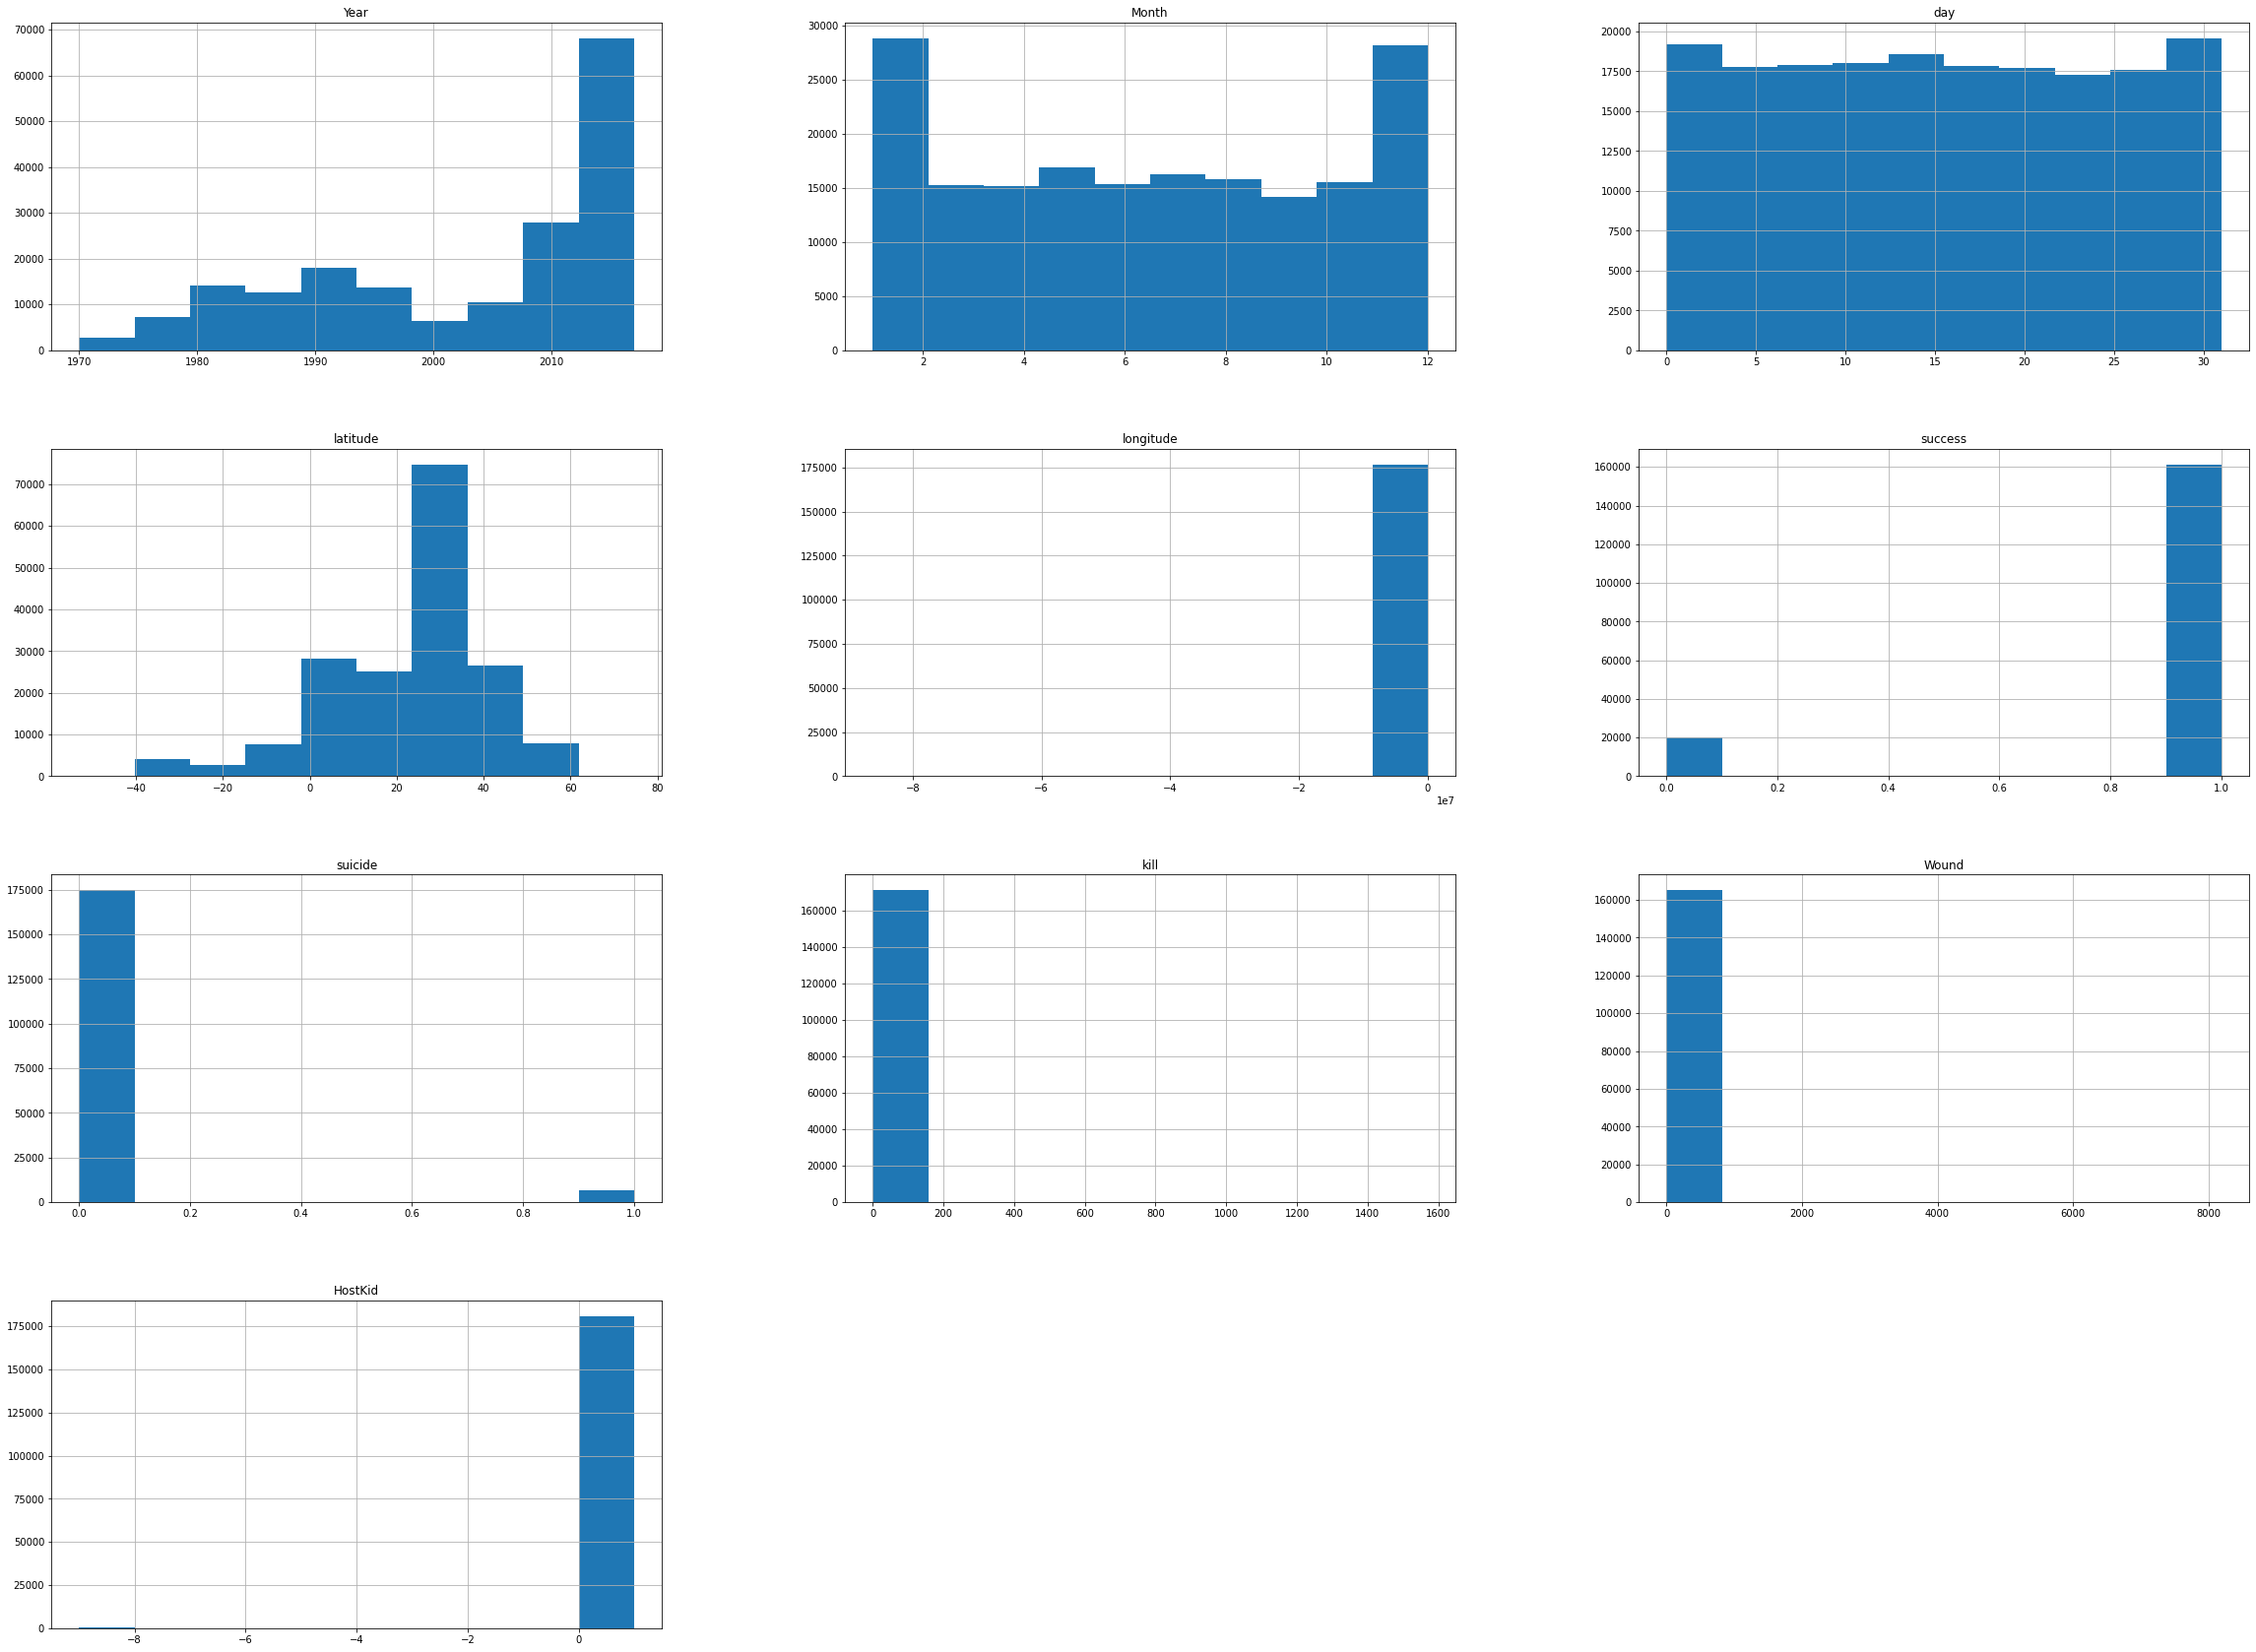

In [ ]:
#Histogram using matplotlib.pyplot
fig, ax3 = plt.subplots(figsize=(40,30))
datanew.hist(ax=ax3);

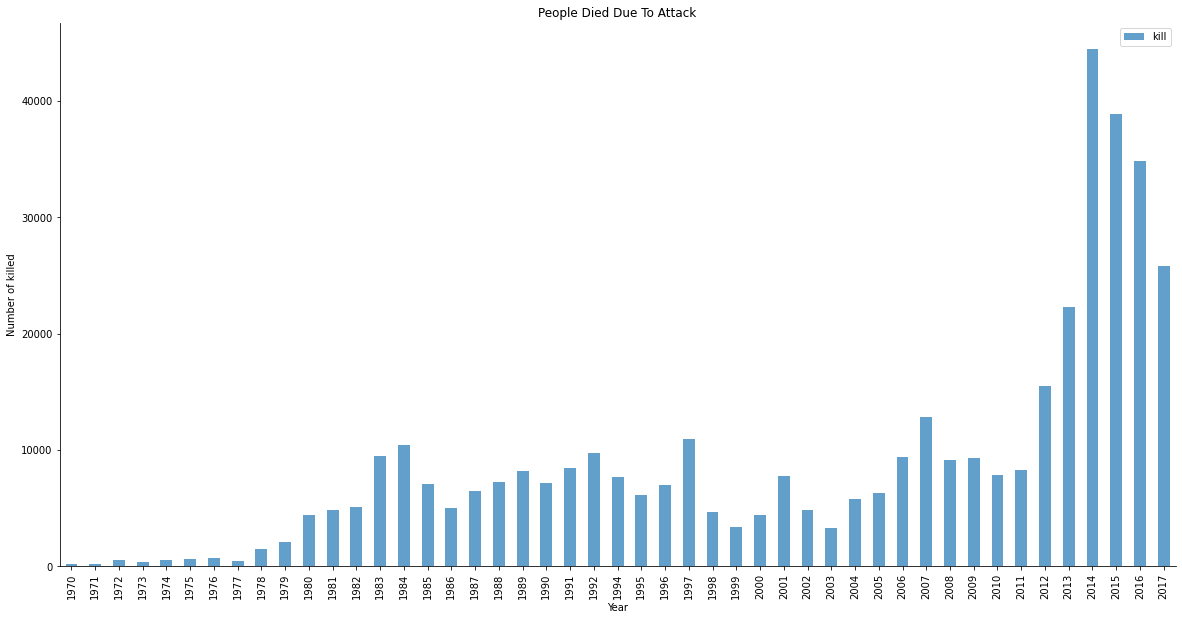

In [ ]:
#Bar graph between number of people killed vs year
df=datanew[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
ax4.set_title("People Died Due To Attack")
plt.ylabel("Number of killed")
plt.xlabel('Year')
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

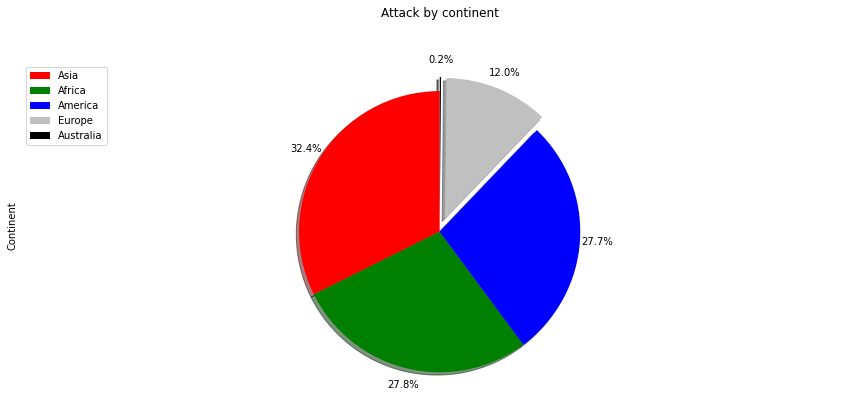

In [ ]:
#Pie chart of number of attacks by continent
colors_list = ['red', 'green',  'blue','silver', 'black']
explode_list = [0., 0, 0, 0.1, 0.1]

datanew['Continent'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list, 
                            explode=explode_list
                            )
plt.title('Attack by continent', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=datanew['Continent'].value_counts().index, loc='upper left') 

plt.show()

Text(0, 0.5, 'Number of attack')

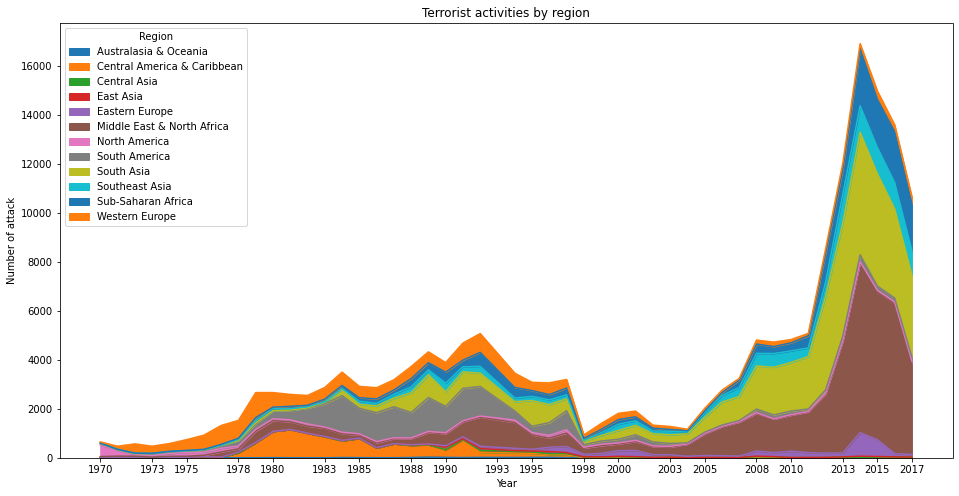

In [ ]:
pd.crosstab(datanew.Year,datanew.Region).plot(kind="area",figsize=(16,8))
plt.xticks(np.ceil(np.linspace(datanew['Year'].min(),datanew['Year'].max(),20)))
plt.title("Terrorist activities by region")
plt.ylabel("Number of attack")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Attack per year')

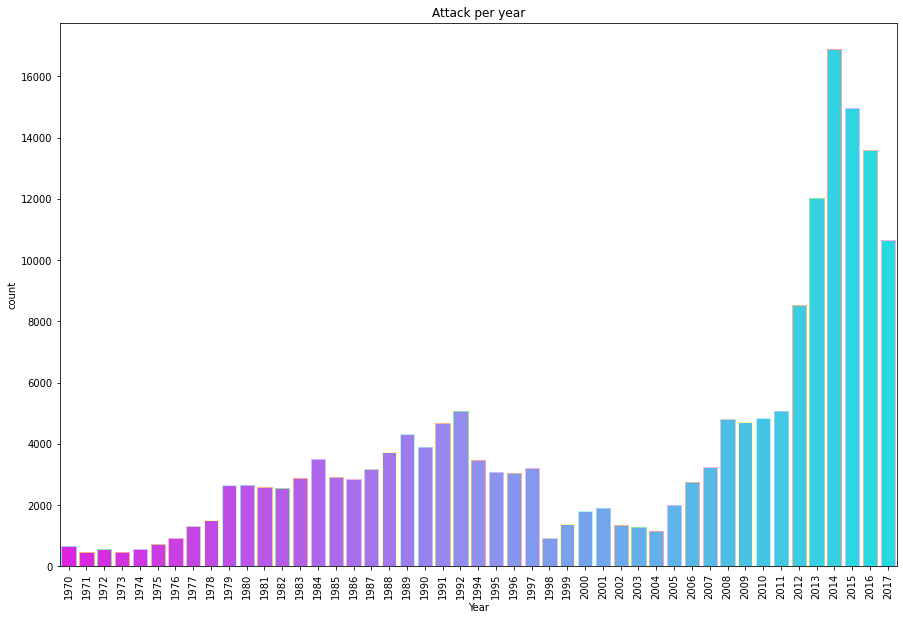

In [ ]:
#Countplot Attack per year
plt.subplots(figsize=(15,10))
sns.countplot("Year",data=datanew,palette="cool_r",edgecolor=sns.color_palette("pastel",10));
plt.xticks(rotation=90)
plt.title("Attack per year")

In [ ]:
#Increase in attack from 1970 to 2017
a=datanew["Year"].value_counts().to_dict()
print("The number of attack increased since 1970 to 2017 is {}%".format(np.round(((a[2017]-a[1970])/a[2017]) *100)))

The number of attack increased since 1970 to 2017 is 94.0%


Text(0.5, 1.0, 'Top 10 effected city')

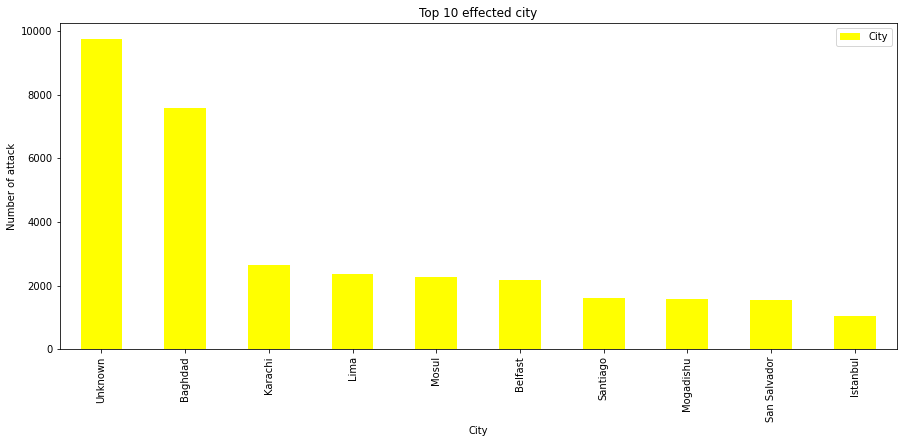

In [ ]:
#Top 10 worst affected cities by attacks
datanew['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(15,6),color="Yellow")
plt.xlabel("City")
plt.ylabel("Number of attack")
plt.title("Top 10 effected city")

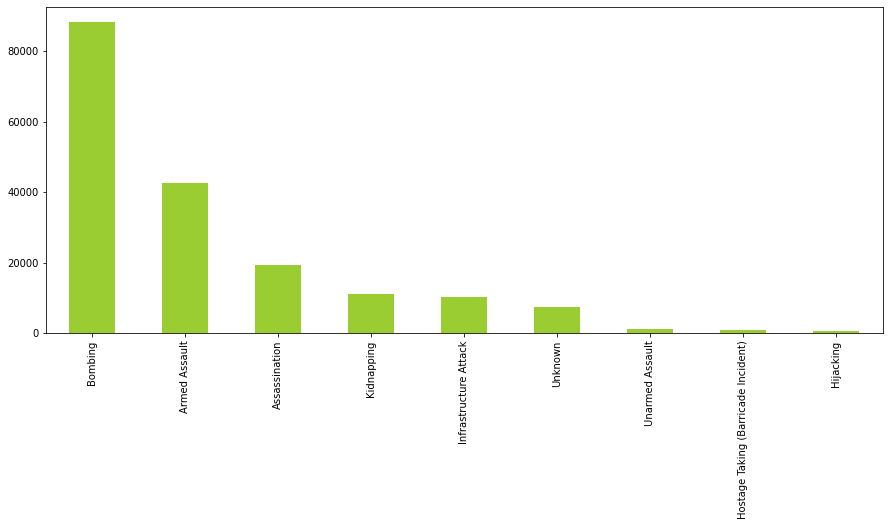

In [ ]:
datanew['Attacktype'].value_counts().plot(kind='bar',figsize=(15,6),color="Yellowgreen")

Text(0.5, 0, 'Attack types')

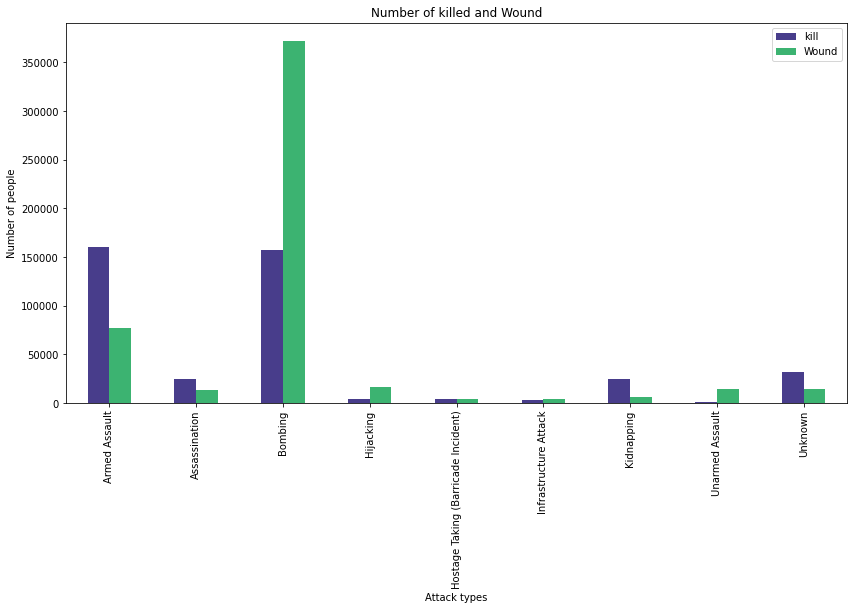

In [ ]:
#Attack types vs number of casualties
datanew[['Attacktype','kill','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(14,7),color=['darkslateblue', 'mediumseagreen'])
plt.title("Number of killed and Wound")
plt.ylabel('Number of people ')
plt.xlabel('Attack types')

In [ ]:
datanew[['Country','kill']].groupby(['Country'],axis=0).sum().sort_values('kill',ascending=False).head(1).reset_index().iloc[0,:].to_dict()

{'Country': 'Iraq', 'kill': 78459.0}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Attack per year')

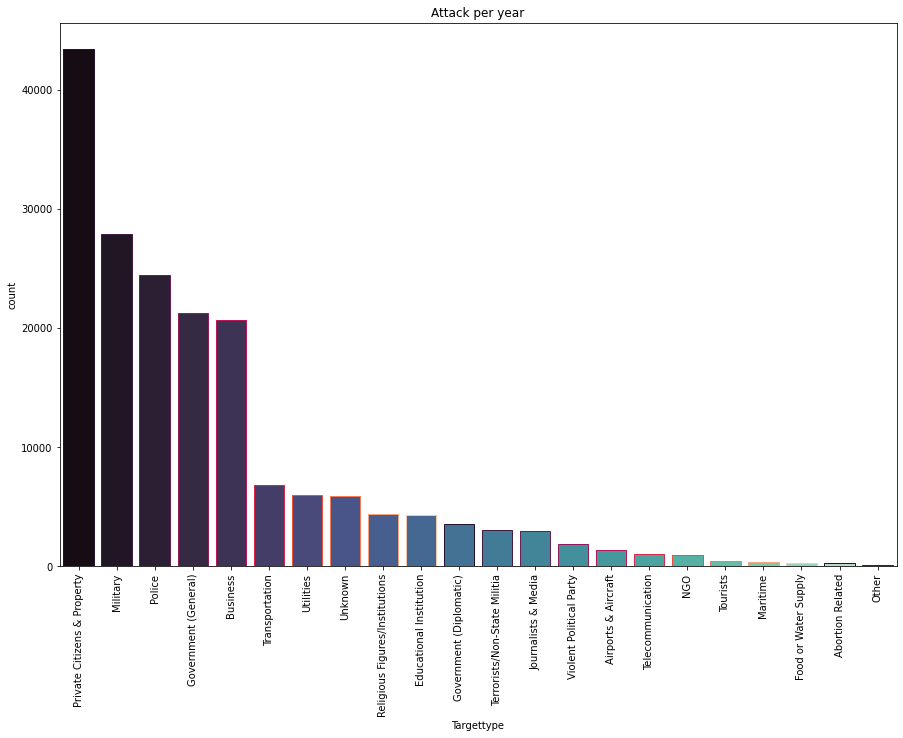

In [ ]:
#Number of attacks on various targets
plt.subplots(figsize=(15,10))
sns.countplot(datanew["Targettype"],order=datanew['Targettype'].value_counts().index,palette="mako",edgecolor=sns.color_palette("rocket",10));
plt.xticks(rotation=90)
plt.title("Attack per year")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

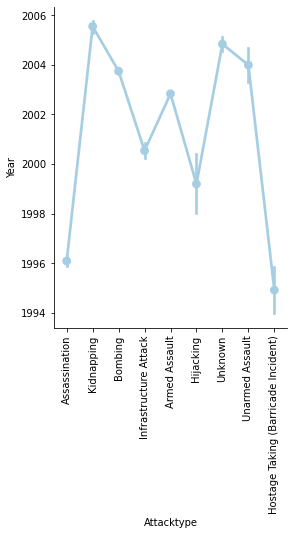

In [ ]:
sns.set_palette("Paired")
sns.factorplot(x="Attacktype", y="Year", data=datanew)
plt.xticks(rotation=90)

In [ ]:
df=datanew.groupby(['Country'],as_index=False).count()

In [ ]:
fig=px.choropleth(df,locations='Country',locationmode="country names",color='Year',hover_name='Country',projection='orthographic',title="Acttack Since 1970-2017",labels={'Year':'Attack'})
fig.show()

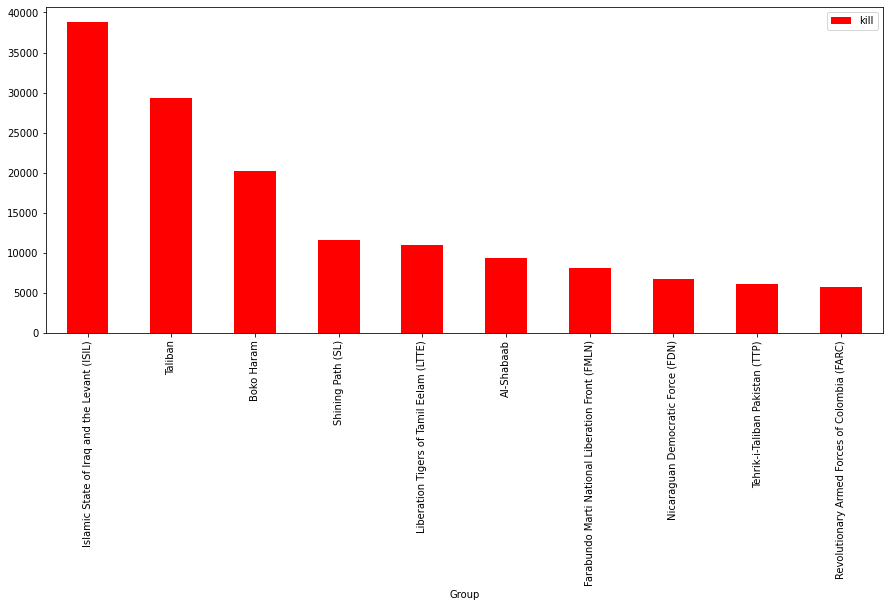

In [ ]:
datanew[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='red',figsize=(15,6))

In [ ]:
df=datanew[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,30935.0
1,Taliban,Afghanistan,29186.0
2,Boko Haram,Nigeria,16815.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8163.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6874.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [ ]:
import folium
world_map = folium.Map(location=[0, 0], zoom_start=8)
folium.Choropleth(geo_data='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json', name='choropleth',
    data=df,
    columns=['Country','kill'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percentage of people'
).add_to(world_map)
folium.LayerControl().add_to(world_map)
world_map